# Lens Modeling for DESIJ0132-1600

##### Author(s): Anik Biswas, S M Rafee Adnan, **Fahim Rajit Hossain**

In [4]:
!pip install emcee
import emcee
!pip install corner
import corner
import h5py
import joblib
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.0 MB/s eta 0:00:00


In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip show nbformat
!pip show nbconvert
!pip install --upgrade nbconvert
!pip install pre-commit

Name: nbformat
Version: 5.9.2
Summary: The Jupyter Notebook format
Home-page: 
Author: 
Author-email: Jupyter Development Team <jupyter@googlegroups.com>
License: BSD 3-Clause License
        
        - Copyright (c) 2001-2015, IPython Development Team
        - Copyright (c) 2015-, Jupyter Development Team
        
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        1. Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
        
        2. Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
        
        3. Neither the name of the copyright holder nor the names of its
  

In [3]:
!pip install lenstronomy
!pip install ruff

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.0 MB/s eta 0:00:00
  Created wheel for lenstronomy: filename=lenstronomy-1.11.5-py3-none-any.whl size=1139060 sha256=f268f10eff792b50824fb14fc7bdd56604d2be93a400f9a84177edd196f8f5c4
  Stored in directory: /root/.cache/pip/wheels/78/dd/d9/bbdd80cec79b57ec559b7183476b0e8802a2c029e312d05b0f
  Created wheel for schwimmbad: filename=schwimmbad-0.3.2-py3-none-any.whl size=15729 sha256=7658463a3fb6020095e1717e1bedb24fbd5939b6232dbc7a4c9d07e4d61eb6f7
  Stored in directory: /root/.cache/pip/wheels/4a/ea/3e/b79646d96eaea548b8ee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 36.3 MB/s eta 0:00:00


In [5]:
!pip install cobaya
from lenstronomy.Util import mask_util
from lenstronomy.Data.coord_transforms import Coordinates
from lenstronomy.Util import util
from lenstronomy.Workflow.fitting_sequence import FittingSequence
from lenstronomy.Plots.model_plot import ModelPlot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.8/378.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cobaya: filename=cobaya-3.3.2-py3-none-any.whl size=441781 sha256=6f228ee9375f800ce2b4e039768dfb397effe2e82f20fbab0f7394272fa7759e
  Stored in directory: /root/.cache/pip/wheels/1f/7e/3c/24db894857d5053ad479a4532ffa907db93136b388ee3feab7
  Created wheel for GetDist: filename=GetDist-1.4.3-py3-none-any.whl size=227490 sha256=36a0880874429176c942617f330b4399f66217066902d2fbeb1d97e3981efd9b
  Stored in directory: /root/.cache/pip/wheels/35/fe/b3/e3373dbaf0f25d53a2d313d26c2d7fc4a64f3e13d5d9f5c5e7
  Created wheel for py-bobyqa: filename=Py_BOBYQA-1.4-py3-none-any.whl size=43290 sha256=2fb0cd91f167f3cb55c30c4b62f8d7850ec7e9aac44c8355218a9e7b0accc3da
  Stored in directory: /root/.cache/pip/whe

## Loading Data from h5 Files

In [6]:
with h5py.File("DESIJ0132-1600_F140W.h5", "r") as f:
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]


# load HDF5 psf file using h5py
with h5py.File("psf_F140W.h5", "r") as f:
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]
kwargs_psf["psf_type"] = "PIXEL"


kwargs_data

{'background_rms': 0.015737876438598787,
 'dec_at_xy_0': -7.239999999999993,
 'exposure_time': array([[495.25476, 403.6011 , 453.53333, ..., 472.42017, 412.46506,
         489.70682],
        [412.80304, 515.1279 , 476.61252, ..., 476.53165, 445.4861 ,
         535.7192 ],
        [482.8193 , 496.1837 , 400.38693, ..., 357.60785, 298.3937 ,
         396.26035],
        ...,
        [441.2676 , 450.2588 , 376.2917 , ..., 236.26028, 390.93497,
         169.68163],
        [616.7411 , 419.57428, 460.05017, ..., 258.5865 , 227.25743,
         498.26813],
        [421.1636 , 456.823  , 494.05148, ..., 491.05872, 234.55467,
         349.67188]], dtype=float32),
 'image_data': array([[ 0.00430852,  0.00739825,  0.01483097, ...,  0.61809156,
          0.73717307,  1.03075923],
        [ 0.00502319, -0.03017073, -0.00753662, ...,  0.57677819,
          0.67688715,  0.79889763],
        [ 0.01126465,  0.0042542 ,  0.00804784, ...,  0.50703695,
          0.57667449,  0.61907252],
        ...,
   

<ipython-input-7-fb3fb1c7e351>:7: RuntimeWarning: invalid value encountered in log10
  axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
<ipython-input-7-fb3fb1c7e351>:10: RuntimeWarning: invalid value encountered in log10
  axes[1].imshow(np.log10(image), origin="lower", cmap="cubehelix")


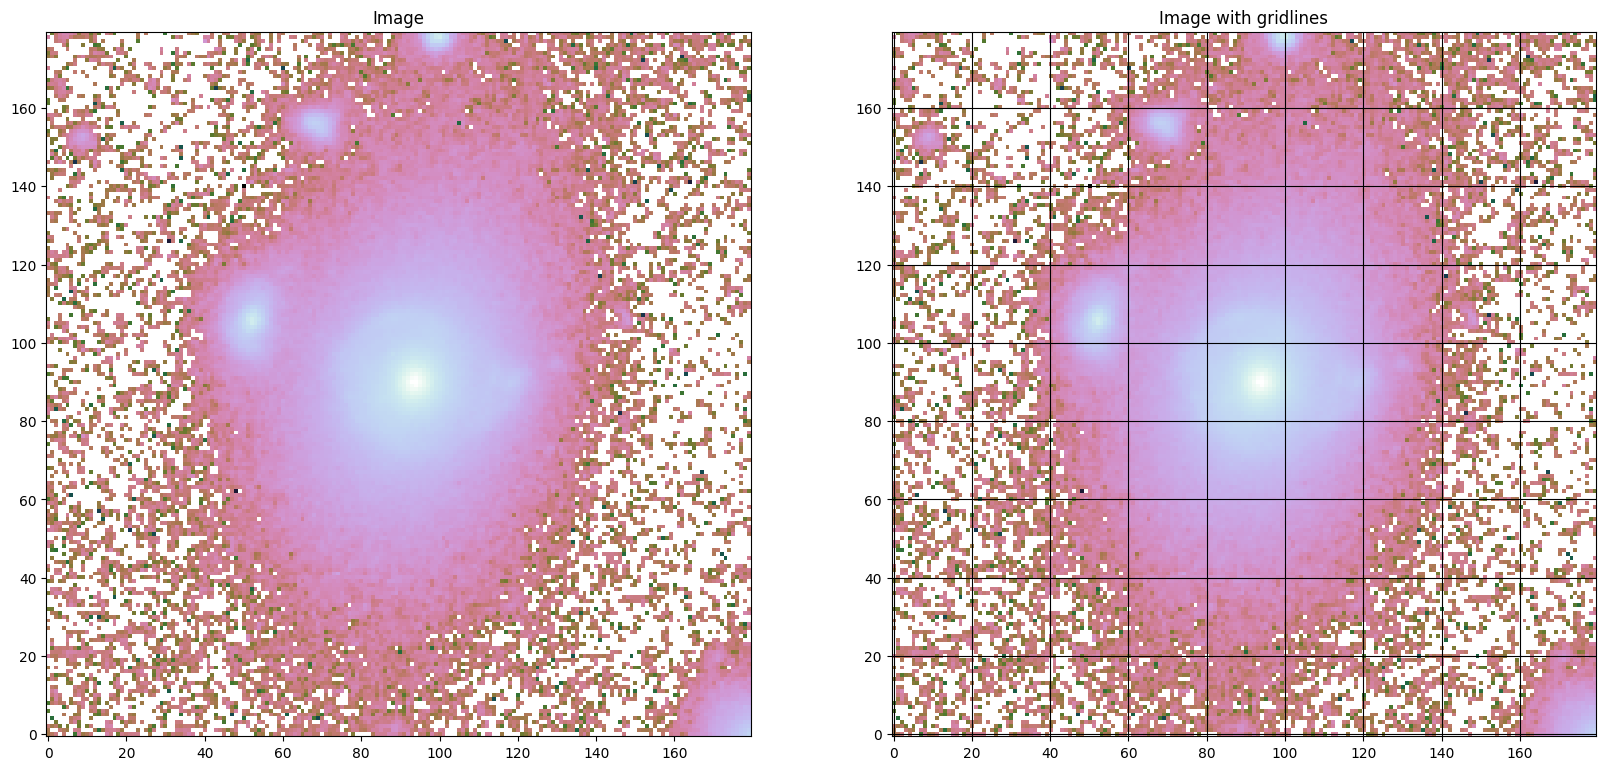

In [7]:
# extracting image_data from kwargs_data
image = kwargs_data["image_data"]

# Make the plot
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[0].set_title("Image")

axes[1].imshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[1].set_title("Image with gridlines")
axes[1].grid(True, color="black")

# Show the plots
plt.show()

## Creating Mask

In [8]:
# To make a mask using lenstronomy functions, here is an example code:

ra_at_xy_0 = kwargs_data["ra_at_xy_0"]
dec_at_xy_0 = kwargs_data["dec_at_xy_0"]
transform_pix2angle = kwargs_data["transform_pix2angle"]

coords = Coordinates(transform_pix2angle, ra_at_xy_0, dec_at_xy_0)
num_pix = len(kwargs_data["image_data"])

x_coords, y_coords = coords.coordinate_grid(num_pix, num_pix)

r = 7.1  # arcsecond
# b = 4
lens_center_ra = 0
lens_center_dec = 0

mask_outer = mask_util.mask_center_2d(
    lens_center_ra,
    lens_center_dec,
    r,
    util.image2array(x_coords),
    util.image2array(y_coords),
)


mask_ext_1 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra + 3,
    lens_center_dec + 1.2,
    1.1,
    1.7,
    np.pi / 10,
)

mask_ext_2 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra + 1.8,
    lens_center_dec + 5.1,
    0.7,
    0.7,
    0,
)
mask_ext_3 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra - 0.7,
    lens_center_dec + 6.7,
    0.7,
    0.7,
    0,
)
mask_ext_4 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra - 3.2,
    lens_center_dec + 0.23,
    0.3,
    0.3,
    0,
)

mask_ext_5= mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra-0.4,
    lens_center_dec-0.1,
    0.25, 0.25,0)


mask = (
    (1 - mask_outer)
    * (1 - mask_ext_1)
    * (1 - mask_ext_2)
    * (1 - mask_ext_3)
    * (1 - mask_ext_4)
    * (1 - mask_ext_5)
)
mask[mask >= 1] = 1
mask[mask < 0] = 0

mask_img_1 = mask.reshape(num_pix, num_pix)

<ipython-input-9-b13eaadb318b>:4: RuntimeWarning: invalid value encountered in log10
  axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
<ipython-input-9-b13eaadb318b>:14: RuntimeWarning: divide by zero encountered in log10
  image_after_mask = np.log10(image * mask)
<ipython-input-9-b13eaadb318b>:14: RuntimeWarning: invalid value encountered in log10
  image_after_mask = np.log10(image * mask)


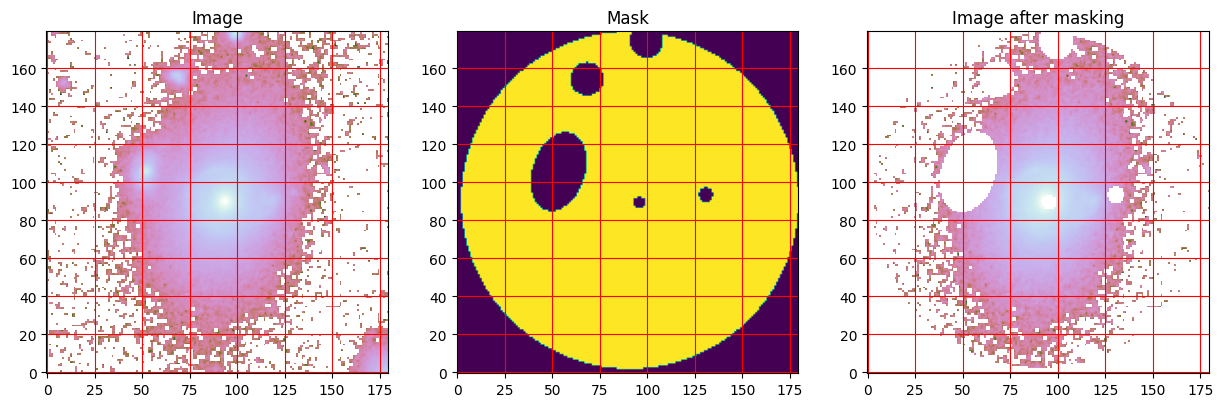

In [9]:
# Setting the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 15))

axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[0].grid(True, color="red")
axes[0].set_title("Image")

mask = mask.reshape(num_pix, num_pix)

axes[1].imshow(mask, origin="lower")
axes[1].grid(True, color="red")
axes[1].set_title("Mask")

image_after_mask = np.log10(image * mask)

axes[2].imshow(image_after_mask, origin="lower", cmap="cubehelix")
axes[2].grid(True, color="red")
axes[2].set_title("Image after masking")
# Show the plots
plt.show()

## Building a lens model

Here, we build a lens model. The lens model can be thought of three
components: the lens galaxy's mass model, the lens galaxy's light model, and
the source galaxy's light model. We have to give a list of profiles for each
 component as shown in the next codecell.

The `'EPL'` lens mass profile stands for Elliptical Power Law. The form of
this convergence profile is given by:
$$\kappa(x, y) = \frac{3 - \gamma}{2} \left[ \frac{\theta_{\rm E}}{\sqrt{q
x^2 + y^2 / q}} \right]^{\gamma - 1}. $$

The position angle $\phi$ adjusts the orientation of the mass profile's
major axis. The ellipticity parameters $q$ and $\phi$ can be reformulated as
$$e_1 = \frac{1 - q}{1 + q} \cos 2\phi,$$
$$e_2 = \frac{1 - q}{1 + q} \sin 2\phi.$$

`lenstronomy` uses $e_1$ and $e_2$ instead of $q$ and $\phi$, because $e_1$
and $e_2$ are easier to handle in numerical optimization, for example, in
MCMC. We checked [here](https://github.com/lenstronomy/lenstronomy-tutorials/blob/main/Notebooks/GettingStarted/units_coordinates_parameters_definitions.ipynb) for more details on
parameter definitions and conventions used in `lenstronomy`.


Both the lens galaxy's and the source galaxy's light profiles are modeled
with Sersic function, which is given by:

$$I(x, y) = I_{\rm e} \exp \left[ -b_{n} \left\{ \left( \frac{\sqrt{qx^2
+ y^2/q}}{R_{\rm Sersic}} \right)^{1/n_{\rm Sersic}} - 1 \right\}
\right].$$

## Lens Modeling with Lenstronomy

In [10]:
lens_model_list = ["EPL", "SHEAR"]
source_model_list = ["SERSIC_ELLIPSE", "SHAPELETS"]
lens_light_model_list = ["SERSIC_ELLIPSE", "SERSIC_ELLIPSE"]

## Lens Galaxy's Mass Model

### EPL Parameters

In [11]:
fixed_lens = []
kwargs_lens_init = []
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []


fixed_lens.append({"gamma": 2})
kwargs_lens_init.append(
    {
        "theta_E": 1.53,
        "gamma": 2,
        "e1": -0.0820,
        "e2": -0.1179,
        "center_x": -0.3096,
        "center_y": 0.03622,
    }
)
kwargs_lens_sigma.append(
    {
        "theta_E": 0.1,
        "gamma": 0.1,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.5,
        "center_y": 0.5,
    }
)
kwargs_lower_lens.append(
    {
        "theta_E": 1,
        "gamma": 1.7,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": -10,
        "center_y": -10,
    }
)
kwargs_upper_lens.append(
    {
        "theta_E": 10.0,
        "gamma": 2.1,
        "e1": 0.5,
        "e2": 0.5,
        "center_x": 10,
        "center_y": 10,
    }
)

### Shear Parameters

In [12]:
fixed_lens.append({"ra_0": 0, "dec_0": 0})

kwargs_lens_init.append({"gamma1": -0.036, "gamma2": -0.028})
kwargs_lens_sigma.append({"gamma1": 0.01, "gamma2": 0.01})
kwargs_lower_lens.append({"gamma1": -0.3, "gamma2": -0.3})
kwargs_upper_lens.append({"gamma1": 0.3, "gamma2": 0.3})

lens_params = [
    kwargs_lens_init,
    kwargs_lens_sigma,
    fixed_lens,
    kwargs_lower_lens,
    kwargs_upper_lens,
]

## Source Galaxy's Light Model

### Sersic Ellipse Parameters

In [13]:
fixed_source = []
kwargs_source_init = []
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []


fixed_source.append({"n_sersic": 1.0})
kwargs_source_init.append(
    {
        "R_sersic": 0.00901,
        "n_sersic": 1,
        "e1": 0.4340,
        "e2": 0.4134,
        "center_x":-0.5522,
        "center_y": 0.045511,
        "amp": 1,
    }
)
kwargs_source_sigma.append(
    {
        "n_sersic": 0.5,
        "R_sersic": 0.001,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.2,
        "center_y": 0.2,
        "amp": 1,
    }
)
kwargs_lower_source.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)
kwargs_upper_source.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 0.2,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)

### Shapelets Parameters

In [14]:
fixed_source.append({"n_max": 10})

kwargs_source_init.append({"center_x":-0.5522, "center_y": 0.045511,
                           "beta": 0.05})
kwargs_source_sigma.append({"center_x": 0.2, "center_y": 0.2,
                            "beta": 0.001})
kwargs_lower_source.append({"center_x": -10, "center_y": -10,
                            "beta": 0.001})
kwargs_upper_source.append({"center_x": 10, "center_y": 10,
                            "beta": 0.1})

source_params = [
    kwargs_source_init,
    kwargs_source_sigma,
    fixed_source,
    kwargs_lower_source,
    kwargs_upper_source,
]

joint_shapelets_with_sersic = [[0, 1, ["center_x", "center_y"]]]

## Lens Galaxy's Light Model

### 1st Sersic Ellipse Parameters

In [15]:
fixed_lens_light = []
kwargs_lens_light_init = []
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({"n_sersic": 1.0})

kwargs_lens_light_init.append(
    {
        "R_sersic": 1.8705,
        "n_sersic": 2,
        "e1": -0.1897,
        "e2": -0.115,
        "center_x": -0.255,
        "center_y": -0.0594,
        "amp": 16,
    }
)
kwargs_lens_light_sigma.append(
    {
        "n_sersic": 1,
        "R_sersic": 0.3,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.1,
        "center_y": 0.1,
        "amp": 1,
    }
)
kwargs_lower_lens_light.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)
kwargs_upper_lens_light.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 10,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)

### 2nd Sersic Ellipse Parameters

In [16]:
fixed_lens_light.append({"n_sersic": 4.0})

kwargs_lens_light_init.append(
    {
        "R_sersic": 0.5280,
        "n_sersic": 2,
        "e1": -0.0355,
        "e2": -0.0266,
        "center_x": -0.2554,
        "center_y": -0.059,
        "amp": 16,
    }
)
kwargs_lens_light_sigma.append(
    {
        "n_sersic": 1,
        "R_sersic": 0.3,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.1,
        "center_y": 0.1,
        "amp": 1,
    }
)
kwargs_lower_lens_light.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)
kwargs_upper_lens_light.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 10,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)

joint_lens_light_with_lens_light = [[0, 1, ["center_x",
                                            "center_y","e1", "e2"]]]

lens_light_params = [
    kwargs_lens_light_init,
    kwargs_lens_light_sigma,
    fixed_lens_light,
    kwargs_lower_lens_light,
    kwargs_upper_lens_light,
]

### Combining all the above specification in the `kwargs_params` dictionary

In [17]:
kwargs_params = {
    "lens_model": lens_params,
    "source_model": source_params,
    "lens_light_model": lens_light_params,
}

kwargs_constraints = {
    "joint_lens_light_with_lens_light": joint_lens_light_with_lens_light,
    "joint_source_with_source": joint_shapelets_with_sersic,
}

In [18]:
kwargs_likelihood = {"check_bounds": True,
                     "image_likelihood_mask_list": [mask]}

kwargs_numerics = {"supersampling_factor": 1,
                   "supersampling_convolution": False}

#### Combining all the information to be sent to lenstronomy

In [19]:
kwargs_model = {
    "lens_model_list": lens_model_list,
    "source_light_model_list": source_model_list,
    "lens_light_model_list": lens_light_model_list,
}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {
    "multi_band_list": multi_band_list,
    "multi_band_type": "single-band"
    # 'multi-linear': every imaging band
    # has independent solutions of the
    # surface brightness, 'joint-linear':
    # there is one joint solution of the
    # linear coefficients demanded across the bands.
}

## The Model Fitting

In [ ]:
# using Particle Swarm Optimization
fitting_kwargs_list = [
    ["PSO", {"sigma_scale": 1.0, "n_particles": 100, "n_iterations": 100}]
]

fitting_seq = FittingSequence(
    kwargs_data_joint,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
    mpi=False,
    verbose=True,
)

input = [
    fitting_kwargs_list,
    multi_band_list,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
]

fit_output = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit(bijective=False)
multi_band_list_out = fitting_seq.multi_band_list

kwargs_fixed_out = fitting_seq._updateManager.fixed_kwargs
output = [
    kwargs_result,
    multi_band_list_out,
    fit_output,
    kwargs_fixed_out,
]

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
Max iteration reached! Stopping.
-1.0314200050869586 reduced X^2 of best position
-11983.037619100285 log likelihood
23236 effective number of data points
[{'theta_E': 1.5219761232234175, 'gamma': 2, 'e1': -0.02197762903917935, 'e2': -0.00755670510246946, 'center_x': -0.574619858193132, 'center_y': 0.11857061527527396}, {'gamma1': 0.029865175825863403, 'gamma2': -0.026854913251682034, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.010839596290586437, 'n_sersic': 1.0, 'e1': 0.2453204010848795, 'e2': 0.27041151090077536, 'center_x': -0.5599355497347474, 'center_y': 0.08796466017021765}, {'amp': 1, 'n_max': 10, 'beta': 0.051650284772433164, 'center_x': -0.5599355497347474, 'center_y': 0.08796466017021765}] source result
[{'amp': 1, 'R_sersic': 1.7725847183067194, 'n_sersic': 1.0, 'e1': -0.1147227203331141, 'e2': -0.08311806423327067, 'center_x': -0.2563468615872801, 'center_y': -0.05043863187447814}, {'amp': 1, 'R_sersic'

In [ ]:
!pip install joblib

In [ ]:
output_path = "./DESIJ0132-1600_pso_output.joblib"

with open(output_path, "wb") as f:
    joblib.dump([input, output], f, compress=True)

## Visualizing the Fitted Model

-1.0275285216172427 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0275285216172425


<ipython-input-76-d6941c3eb5f4>:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


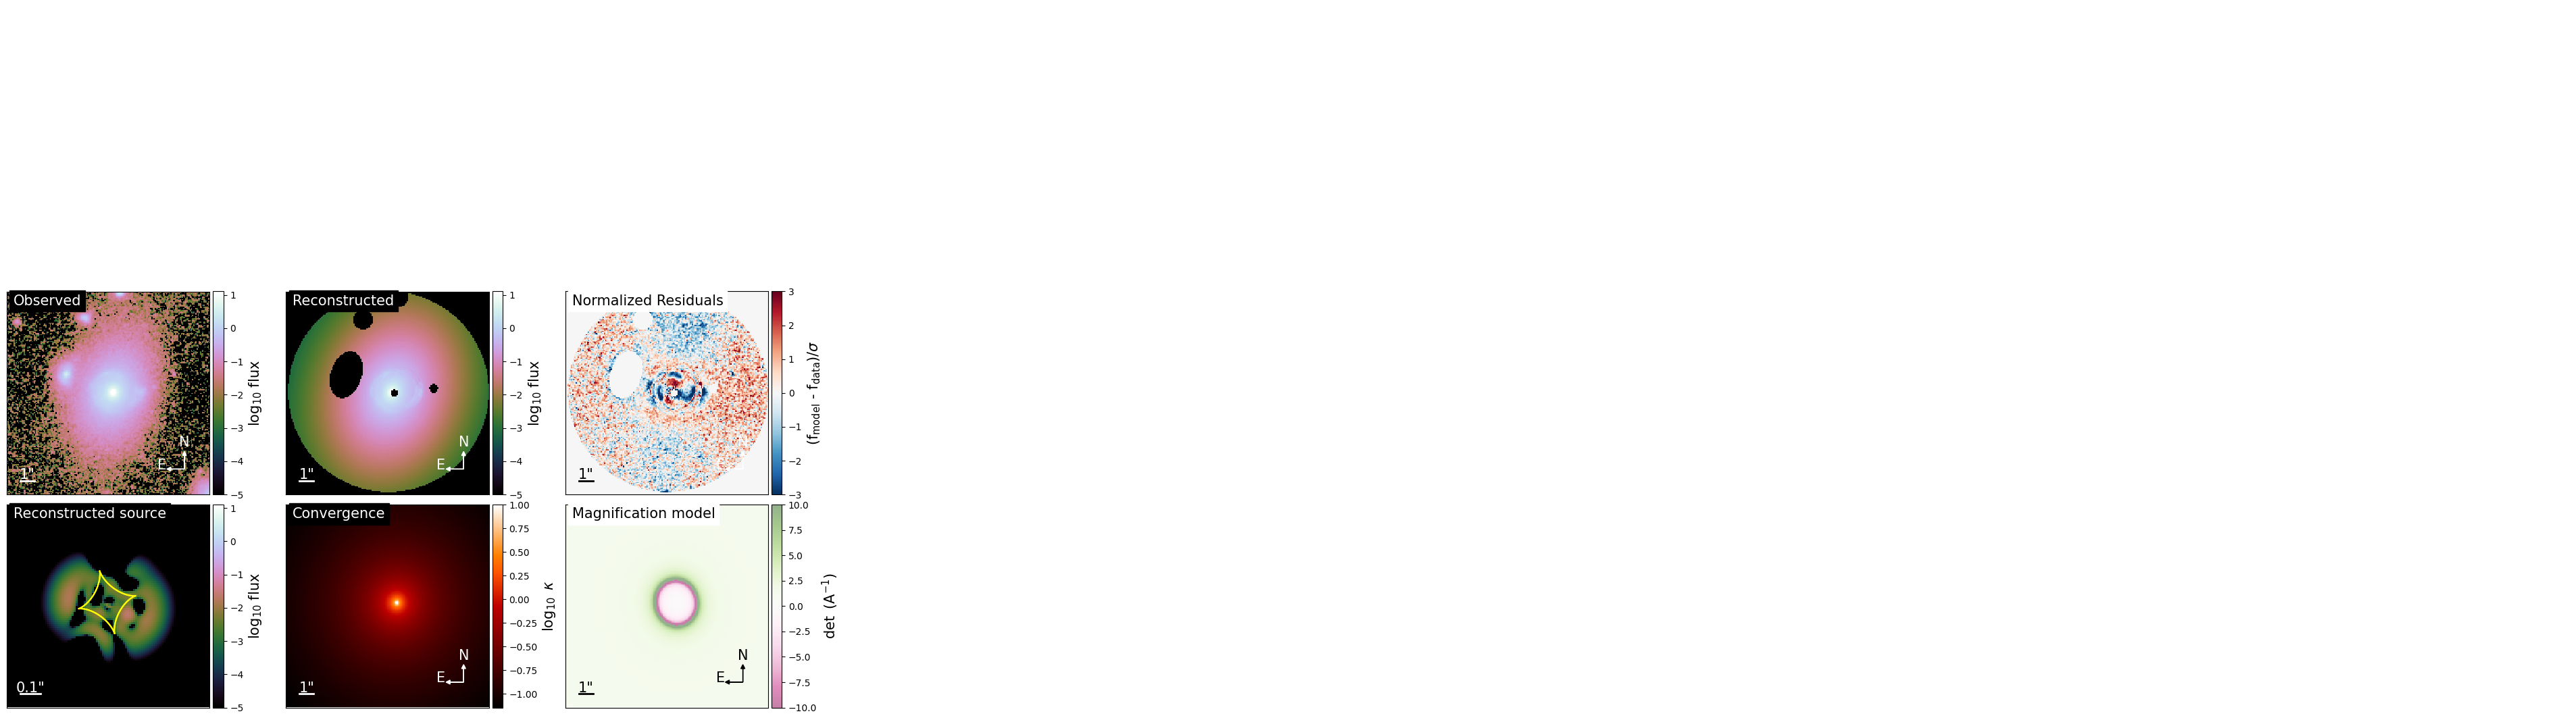

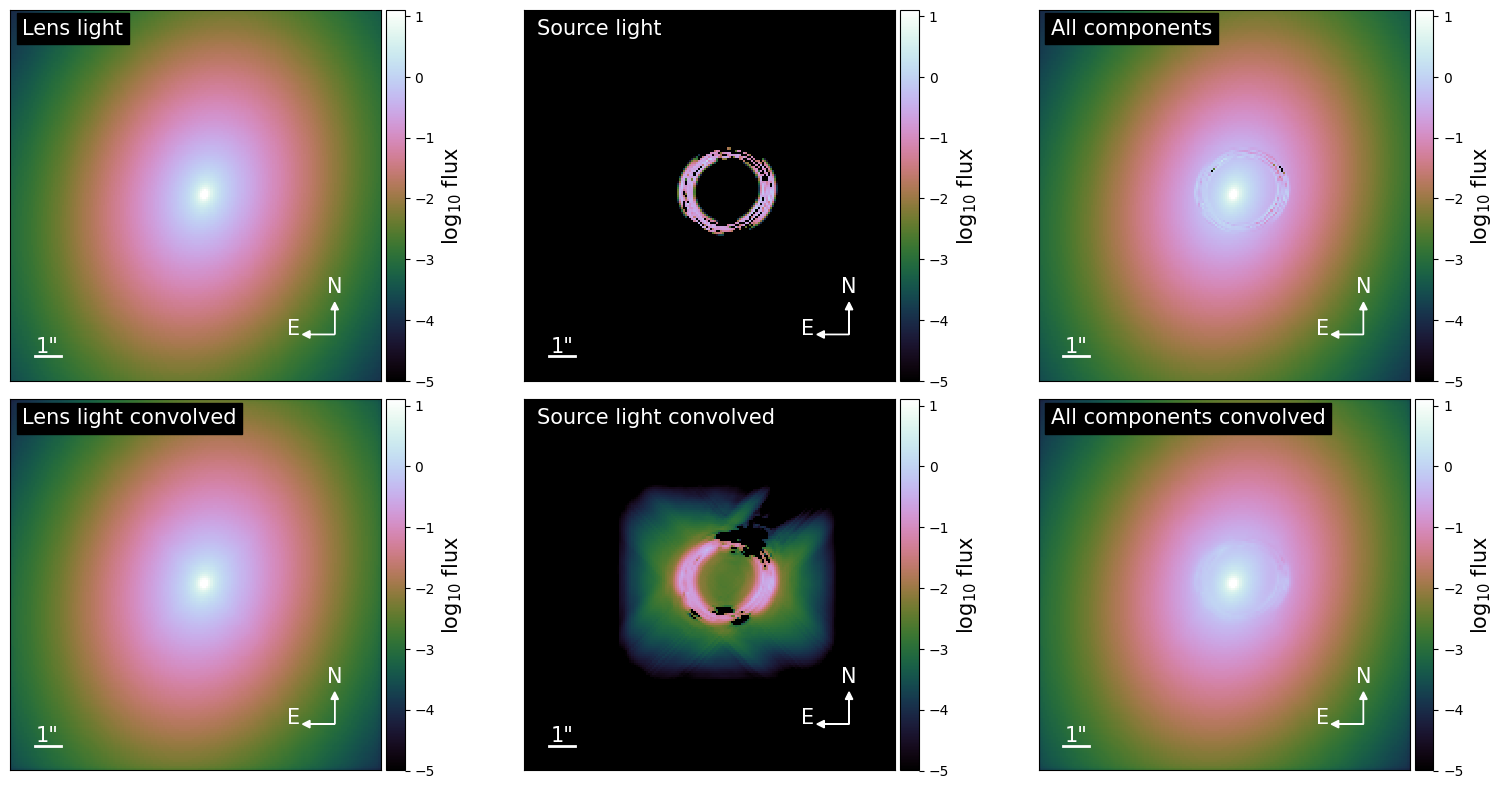

In [ ]:
model_plot = ModelPlot(
    multi_band_list,
    kwargs_model,
    kwargs_result,
    arrow_size=0.02,
    cmap_string="cubehelix",
    image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"],
)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0, 0])
model_plot.model_plot(ax=axes[0, 1])
model_plot.normalized_residual_plot(ax=axes[0, 2], v_min=-3,
                                    v_max=3, cmap="RdBu_r")
model_plot.source_plot(ax=axes[1, 0], deltaPix_source=0.01,
                       numPix=100, with_caustics=True)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap="gist_heat")
model_plot.magnification_plot(ax=axes[1, 2], cmap="PiYG")
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None,
                  top=None, wspace=0.0, hspace=0.05)
plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(
    ax=axes[0, 0], text="Lens light", lens_light_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 0], text="Lens light convolved", lens_light_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 1], text="Source light", source_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 1], text="Source light convolved", source_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 2],
    text="All components",
    source_add=True,
    lens_light_add=True,
    unconvolved=True,
)
model_plot.decomposition_plot(
    ax=axes[1, 2],
    text="All components convolved",
    source_add=True,
    lens_light_add=True,
    point_source_add=True,
)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None,
                  top=None, wspace=0.0, hspace=0.05)
plt.show()

## *running MCMC*

In [30]:
# Define the path to the file on Google Drive
mcmc1_backend = '/content/drive/MyDrive/BDLensing/mcmc1_backend.h5'


fitting_kwargs_list_mcmc = [['MCMC', {'n_burn': 0, 'n_run': 500,
                                      'n_walkers': 80,
                                      'sigma_scale': .1, 'threadCount': 3,
                                      'backend_filename': mcmc1_backend,
                                      'start_from_backend': True}]]

fitting_seq_mcmc = FittingSequence(kwargs_data_joint, kwargs_model,
                                   kwargs_constraints,
                                   kwargs_likelihood, kwargs_params)

chain_list_mcmc = fitting_seq_mcmc.fit_sequence(fitting_kwargs_list_mcmc)
kwargs_result_mcmc = fitting_seq_mcmc.best_fit()


100%|██████████| 500/500 [1:42:19<00:00, 12.28s/it]


Computing the MCMC...
Number of walkers =  80
Burn-in iterations:  0
Sampling iterations (in current run): 500
6139.752090454102 time taken for MCMC sampling


In [31]:
if len(chain_list_mcmc) > 0:
    for i, chain in enumerate(chain_list_mcmc):
        print(f"Chain {i + 1}:")
        print("Sampler type:", chain[0])
        print("Parameter names:", chain[2])
        print("Shape of samples:", chain[1].shape)
        print("")

# Alternatively, you can access the last chain directly

    last_chain = chain_list_mcmc[-1]
    last_samples = last_chain[1]
    last_param_names = last_chain[2]
    print("Last Chain:")
    print("Sampler type:", last_chain[0])
    print("Parameter names:", last_param_names)
    print("Shape of samples:", last_samples.shape)
else:
    print("No MCMC chains available.")


Chain 1:
Sampler type: EMCEE
Parameter names: ['theta_E_lens0', 'e1_lens0', 'e2_lens0', 'center_x_lens0', 'center_y_lens0', 'gamma1_lens1', 'gamma2_lens1', 'R_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'center_x_source_light0', 'center_y_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'R_sersic_lens_light1']
Shape of samples: (312000, 19)

Last Chain:
Sampler type: EMCEE
Parameter names: ['theta_E_lens0', 'e1_lens0', 'e2_lens0', 'center_x_lens0', 'center_y_lens0', 'gamma1_lens1', 'gamma2_lens1', 'R_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'center_x_source_light0', 'center_y_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'R_sersic_lens_light1']
Shape of samples: (312000, 19)


## Visualizing the MCMC chain

<ipython-input-32-d777f8f5ce9d>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if not samples_mcmc == []:


N_step: 3900, N_walkers: 80, N_params: 19
theta_E_lens0 1.3952 ± 0.0048
e1_lens0 -0.1102 ± 0.0207
e2_lens0 -0.0917 ± 0.0166
center_x_lens0 -0.1865 ± 0.0062
center_y_lens0 -0.0035 ± 0.0086
gamma1_lens1 0.0326 ± 0.0102
gamma2_lens1 0.0133 ± 0.0078
R_sersic_source_light0 0.1937 ± 0.0086
e1_source_light0 -0.0231 ± 0.4683
e2_source_light0 -0.0404 ± 0.1092
center_x_source_light0 -0.5221 ± 0.0187
center_y_source_light0 0.0827 ± 0.0156
beta_source_light1 0.0996 ± 0.0004
R_sersic_lens_light0 1.8421 ± 0.0155
e1_lens_light0 -0.1280 ± 0.0013
e2_lens_light0 -0.0826 ± 0.0018
center_x_lens_light0 -0.2609 ± 0.0010
center_y_lens_light0 -0.0535 ± 0.0007
R_sersic_lens_light1 0.3573 ± 0.0105


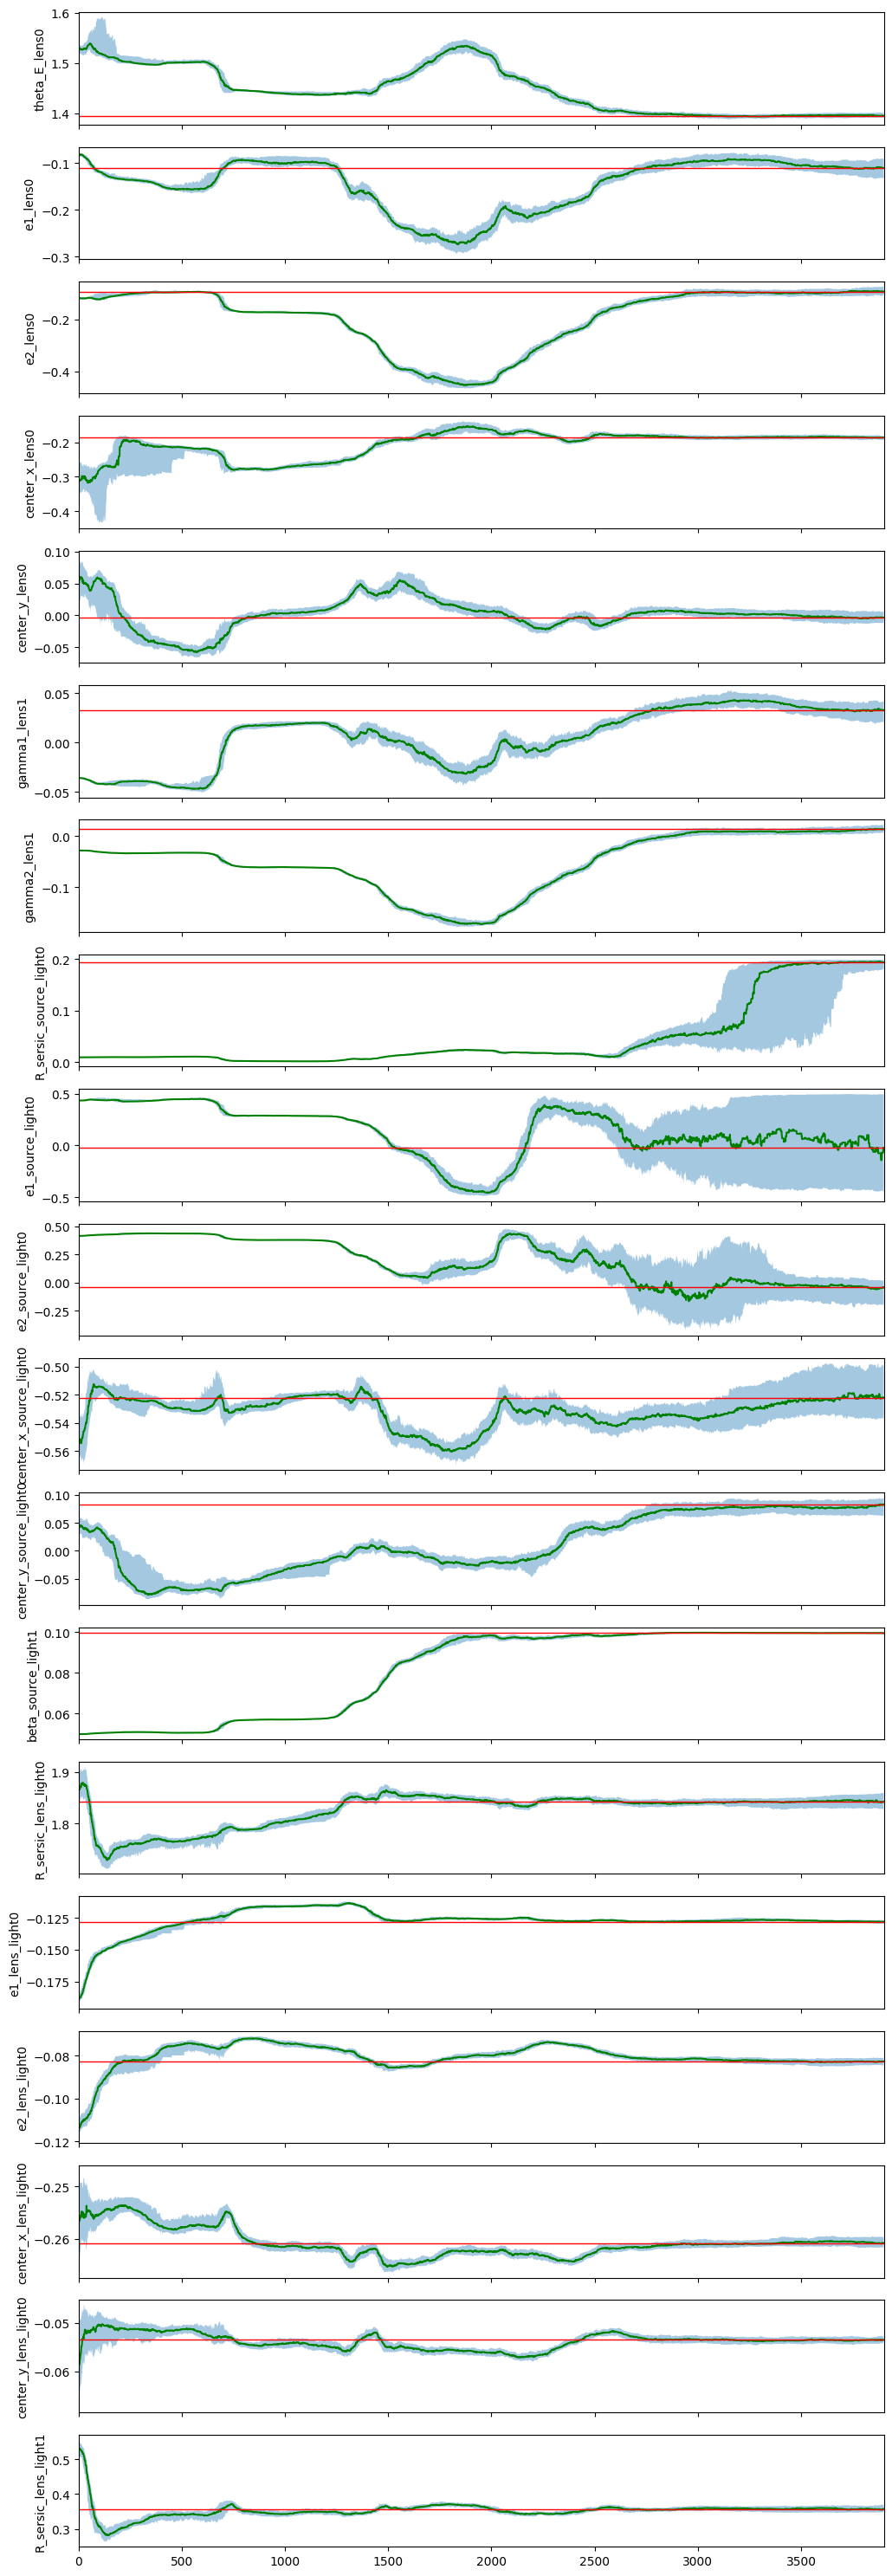

In [32]:
samples_mcmc = []

if chain_list_mcmc[-1][0] != 'PSO':
# if MCMC chain was broken in the chunks,
# we join the chunks to make the full chain
    mcmc_repeat = 1

    for k in range(len(chain_list_mcmc) - mcmc_repeat, len(chain_list_mcmc)):
        samples_mcmc = chain_list_mcmc[k][1]

        param_mcmc = chain_list_mcmc[k][2]

if not samples_mcmc == []:
    n_params = samples_mcmc.shape[1]

    n_walkers = 80  # Adjust the walker ratio as needed
    n_step = 3900 #

    print('N_step: {}, N_walkers: {}, N_params: {}'.format(n_step, n_walkers,
                                                           n_params))

    chain = np.empty((n_walkers, n_step, n_params))

    for i in range(n_params):
        samples = samples_mcmc[:, i]
        reshaped_samples = samples.reshape((n_walkers, n_step), order='F')
        chain[:, :, i] = reshaped_samples

    mean_pos = np.zeros((n_params, n_step))
    median_pos = np.zeros((n_params, n_step))
    std_pos = np.zeros((n_params, n_step))
    q16_pos = np.zeros((n_params, n_step))
    q84_pos = np.zeros((n_params, n_step))

    for i in range(n_params):
        for j in range(n_step):
            mean_pos[i][j] = np.mean(chain[:, j, i])
            median_pos[i][j] = np.median(chain[:, j, i])
            std_pos[i][j] = np.std(chain[:, j, i])
            q16_pos[i][j] = np.percentile(chain[:, j, i], 16.)
            q84_pos[i][j] = np.percentile(chain[:, j, i], 84.)

    fig, ax = plt.subplots(n_params, sharex=True, figsize=(8, 6))

    burnin = -1
    last = n_step

    medians = []

    param_values = [median_pos[0][last - 1],
     (q84_pos[0][last - 1] - q16_pos[0][last - 1]) / 2,
                    median_pos[1][last - 1],
                     (q84_pos[1][last - 1] - q16_pos[1][last - 1]) / 2]

    for i in range(n_params):
        print(param_mcmc[i], '{:.4f} ± {:.4f}'.format(median_pos[i][last - 1],
         (q84_pos[i][last - 1] - q16_pos[i][last - 1]) / 2))

        ax[i].plot(median_pos[i][:last], c='g')
        ax[i].axhline(np.median(median_pos[i][burnin:last]), c='r', lw=1)
        ax[i].fill_between(np.arange(last),
                           q84_pos[i][:last], q16_pos[i][:last], alpha=0.4)
        ax[i].set_ylabel(param_mcmc[i], fontsize=10)
        ax[i].set_xlim(0, last)

        medians.append(np.median(median_pos[i][burnin:last]))

    if True:
        fig.set_size_inches((12., 2 * len(param_mcmc)))
        plt.show()


Number of non-linear parameters in the MCMC process: 19
Parameters in order: ['theta_E_lens0', 'e1_lens0', 'e2_lens0', 'center_x_lens0', 'center_y_lens0', 'gamma1_lens1', 'gamma2_lens1', 'R_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'center_x_source_light0', 'center_y_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'R_sersic_lens_light1']
Number of evaluations in the MCMC process: 312000
312000
Shape of samples_mcmc_cut: (1600, 19)


<ipython-input-33-88d73c47117f>:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if not samples_mcmc_cut == []:


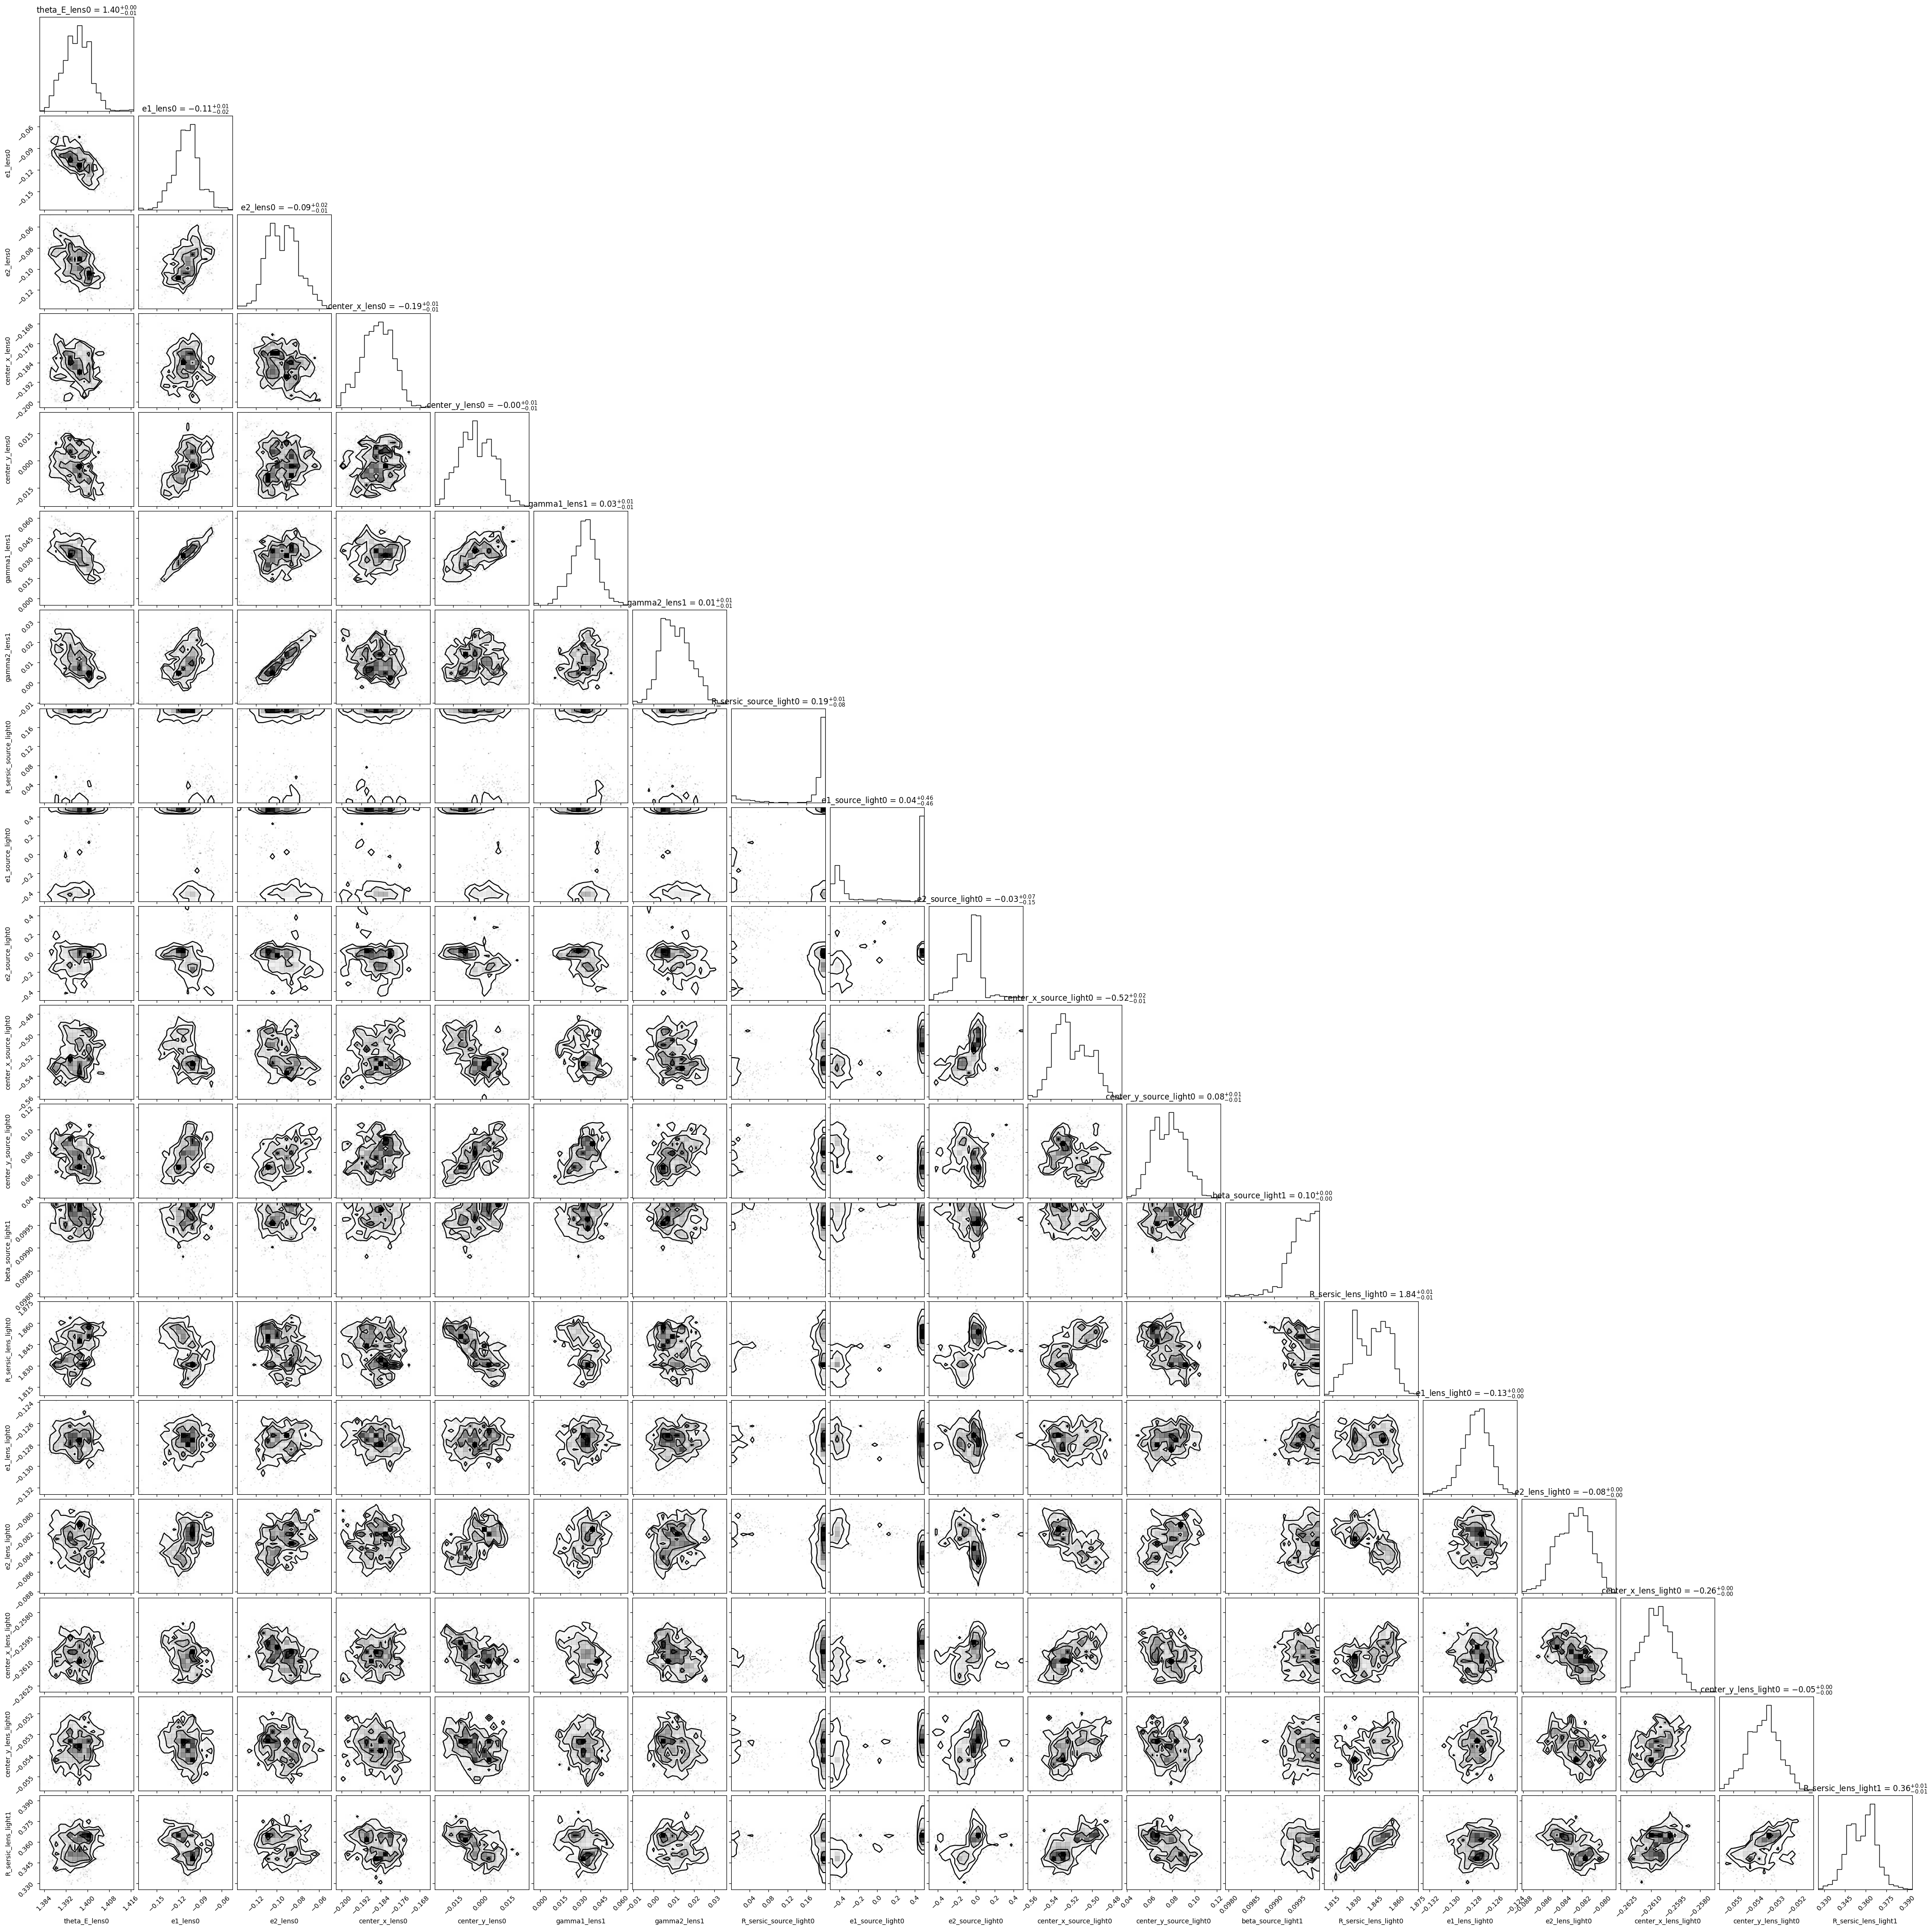

In [33]:
if len(chain_list_mcmc) > 0:
    sampler_type, samples_mcmc, param_mcmc, dist_mcmc = chain_list_mcmc[0]

    param_class = fitting_seq_mcmc.param_class

    print("Number of non-linear parameters in the MCMC process:",
          len(param_mcmc))
    print("Parameters in order:", param_mcmc)
    if samples_mcmc is not None:
        print("Number of evaluations in the MCMC process:",
              np.shape(samples_mcmc)[0])
        n_sample = len(samples_mcmc)
        print(n_sample)
        burnin = 3500
        thin = 20
        samples_mcmc_cut = chain[:, burnin::thin, :].reshape((-1, n_params))
        if not samples_mcmc_cut == []:
            n, num_param = np.shape(samples_mcmc_cut)
            print("Shape of samples_mcmc_cut:", samples_mcmc_cut.shape)
            plot = corner.corner(samples_mcmc_cut, labels=param_mcmc,
                                show_titles=True)
    else:
        print("No samples available for corner plot.")
else:
    print("No MCMC chains available.")

## Visualizing the fitted model with `MCMC`

-0.8994496822914115 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8994496822914118


/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


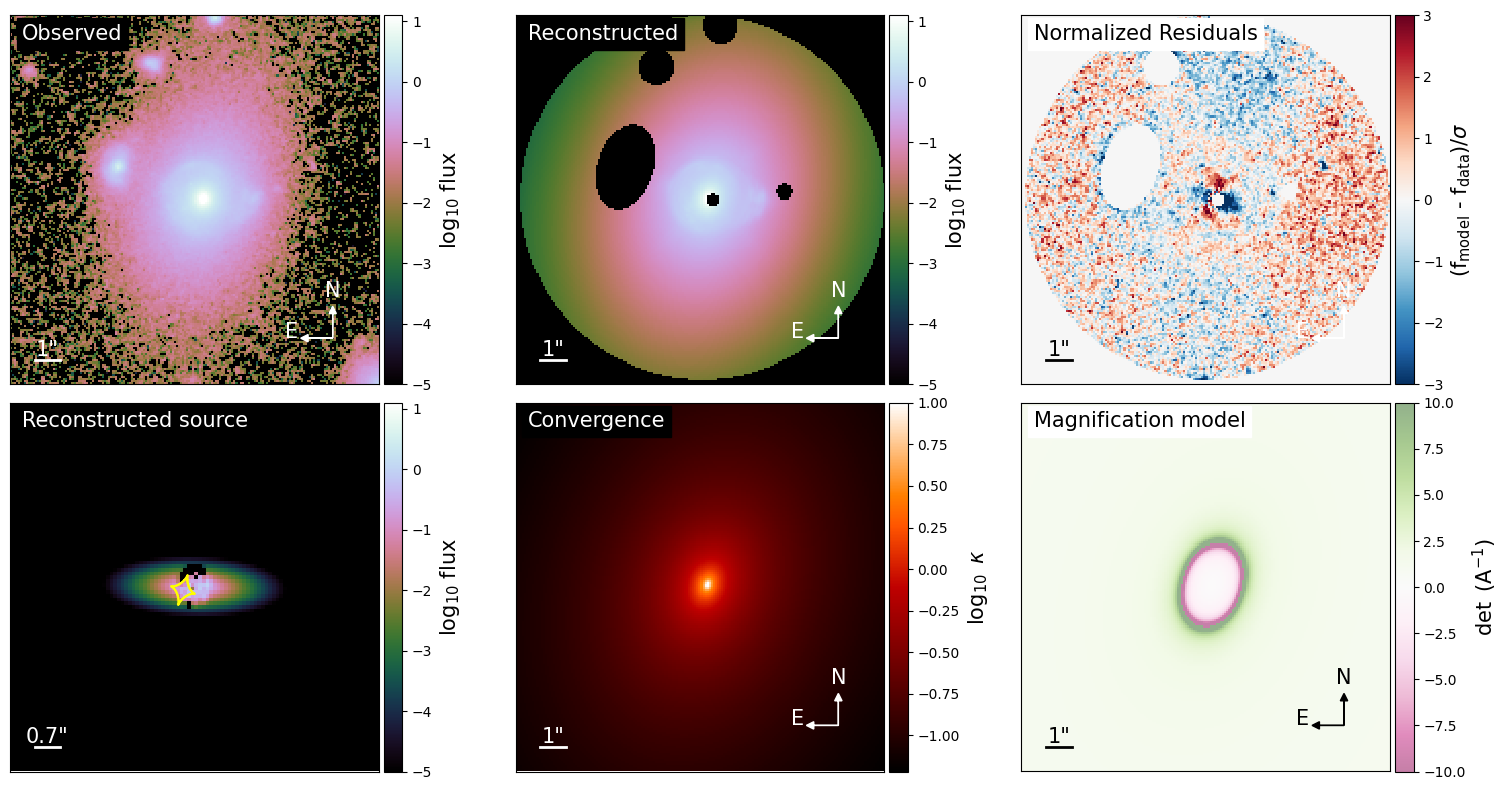

/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:1062: RuntimeWarning: invalid value encountered in log10
  np.log10(model),


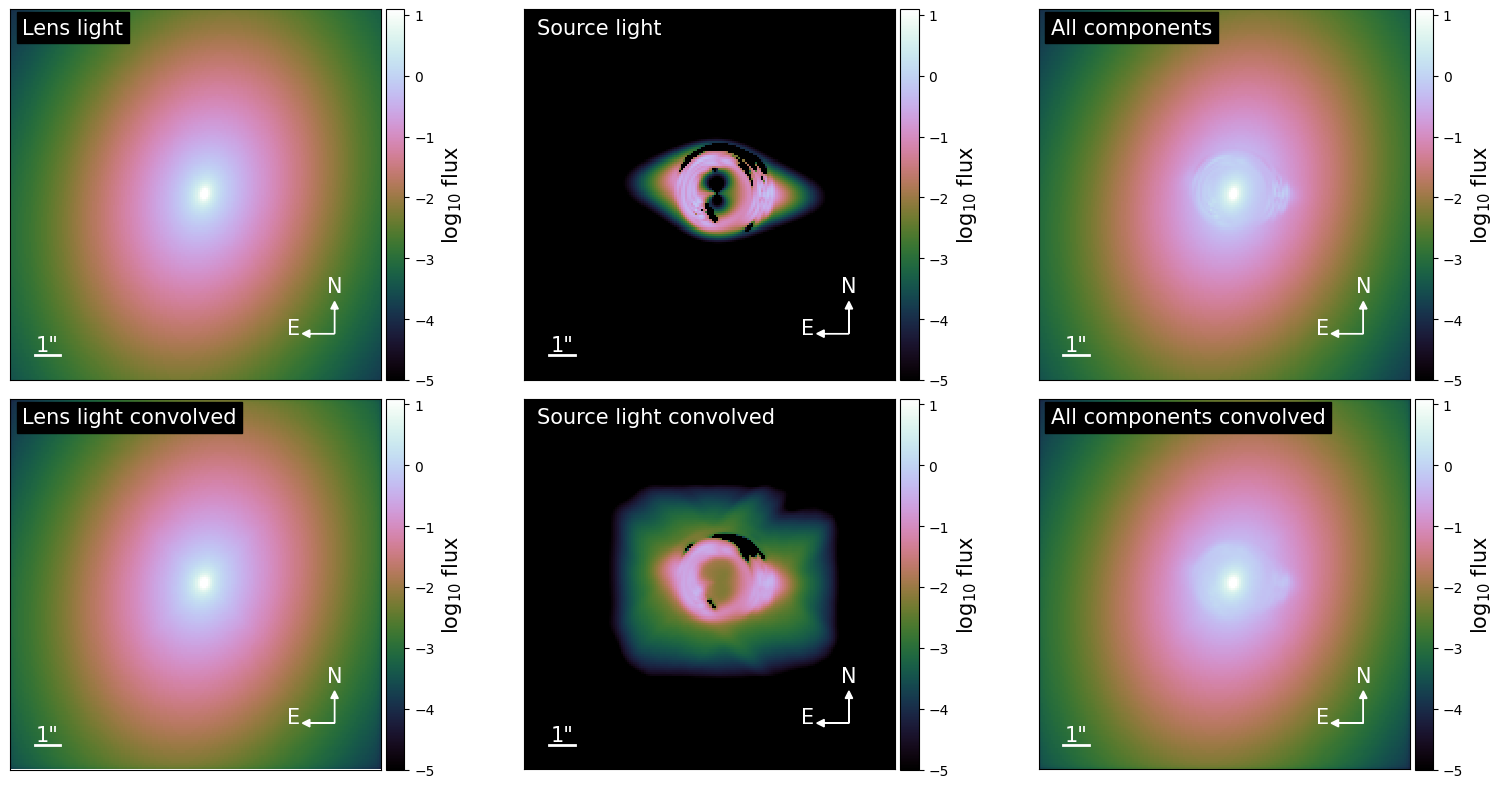

{'kwargs_lens': [{'theta_E': 1.3947724599035518, 'gamma': 2, 'e1': -0.11865368248676852, 'e2': -0.09401746954587711, 'center_x': -0.18702152572146283, 'center_y': -0.00979911403361012}, {'gamma1': 0.02995191144509533, 'gamma2': 0.014013239930823134, 'ra_0': 0, 'dec_0': 0}], 'kwargs_source': [{'amp': 45.09004885613006, 'R_sersic': 0.19364958153753598, 'n_sersic': 1.0, 'e1': 0.49835491636020707, 'e2': 0.026794718647837702, 'center_x': -0.49276008297108026, 'center_y': 0.07239411082277547}, {'amp': array([-144.82474241,  -17.20288046,   -9.95483422,    9.50111441,
          5.66157734,  105.25509247,  -37.18087843,  -18.05682621,
          6.03075945,  -44.22889043,    8.1220414 ,  -25.38389846,
         32.41668033,   -6.48325095,   -5.74914822,  -49.28175767,
        -12.46974341,   -5.99348516,  -36.91622421,  -13.88324028,
        -14.31251962,    2.97894517,  -30.20309728,   15.3892325 ,
          1.03792619,   30.27036174,   -3.20456245,   24.13515938,
        -17.19036981,  -15.132

In [34]:

model_plot = ModelPlot(
    multi_band_list, kwargs_model, kwargs_result_mcmc,
    arrow_size=0.02,
    cmap_string="cubehelix",
    image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"]
)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0, 0])
model_plot.model_plot(ax=axes[0, 1])
model_plot.normalized_residual_plot(ax=axes[0, 2], v_min=-3, v_max=3,
                                   cmap='RdBu_r')
model_plot.source_plot(ax=axes[1, 0], deltaPix_source=0.1, numPix=100,
                       with_caustics=True, scale_size=0.7)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap='gist_heat')
model_plot.magnification_plot(ax=axes[1, 2], cmap='PiYG')

f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None,
                  top=None, wspace=0., hspace=0.05)
plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(ax=axes[0, 0], text='Lens light',
                              lens_light_add=True, unconvolved=True)
model_plot.decomposition_plot(ax=axes[1, 0], text='Lens light convolved',
                              lens_light_add=True)
model_plot.decomposition_plot(ax=axes[0, 1], text='Source light',
                              source_add=True, unconvolved=True)
model_plot.decomposition_plot(ax=axes[1, 1], text='Source light convolved',
                              source_add=True)
model_plot.decomposition_plot(ax=axes[0, 2], text='All components',
                              source_add=True, lens_light_add=True,
                              unconvolved=True)
model_plot.decomposition_plot(ax=axes[1, 2], text='All components convolved',
                              source_add=True, lens_light_add=True,
                              point_source_add=True)

f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None,
                  wspace=0., hspace=0.05)
plt.show()

print(kwargs_result_mcmc)

In [35]:
multi_band_list_out = fitting_seq_mcmc.multi_band_list
kwargs_fixed_out = fitting_seq_mcmc.kwargs_fixed

init_samples = 3900  # can be not `None` for MCMC

input = [fitting_kwargs_list_mcmc, multi_band_list, kwargs_model,
         kwargs_constraints, kwargs_likelihood, kwargs_params, init_samples]
output = [kwargs_result_mcmc, multi_band_list_out,
          kwargs_fixed_out]

output_path = './DESIJ0132_1600_mcmc_output.joblib'

with open(output_path, 'wb') as f:
    joblib.dump([input, output], f, compress=True)